In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import FunctionTransformer, StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from yellowbrick.regressor import ResidualsPlot
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from scipy.stats import randint
import joblib




In [2]:
# pip install xgboost

In [3]:
df_boston = pd.read_csv('boston.csv', header=0, sep=',')
df_boston.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


In [4]:
df_boston.columns = ['crime_rate', 'land_zoned_for_lots', 'non_retail_business', 'charles_river', 'nitric_oxides', 'rooms_per_dwelling', 'ownership_before', 'distance_to_employment', 'access_to_highways', 'tax_per_10k', 'pupil_to_teacher', 'blacks_to_town', 'lower_status_percent', 'value_of_owner_occupied_homes']
df_boston.head(3)

,crime_rate,land_zoned_for_lots,non_retail_business,charles_river,nitric_oxides,rooms_per_dwelling,ownership_before,distance_to_employment,access_to_highways,tax_per_10k,pupil_to_teacher,blacks_to_town,lower_status_percent,value_of_owner_occupied_homes
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


In [5]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   crime_rate                     506 non-null    float64
 1   land_zoned_for_lots            506 non-null    float64
 2   non_retail_business            506 non-null    float64
 3   charles_river                  506 non-null    int64  
 4   nitric_oxides                  506 non-null    float64
 5   rooms_per_dwelling             506 non-null    float64
 6   ownership_before               506 non-null    float64
 7   distance_to_employment         506 non-null    float64
 8   access_to_highways             506 non-null    int64  
 9   tax_per_10k                    506 non-null    float64
 10  pupil_to_teacher               506 non-null    float64
 11  blacks_to_town                 506 non-null    float64
 12  lower_status_percent           506 non-null    flo

In [6]:
df_boston.isnull().sum()

crime_rate                       0
land_zoned_for_lots              0
non_retail_business              0
charles_river                    0
nitric_oxides                    0
rooms_per_dwelling               0
ownership_before                 0
distance_to_employment           0
access_to_highways               0
tax_per_10k                      0
pupil_to_teacher                 0
blacks_to_town                   0
lower_status_percent             0
value_of_owner_occupied_homes    0
dtype: int64

In [7]:
pd.options.display.max_columns= None
pd.options.display.max_rows = None
print(df_boston.columns.tolist())

['crime_rate', 'land_zoned_for_lots', 'non_retail_business', 'charles_river', 'nitric_oxides', 'rooms_per_dwelling', 'ownership_before', 'distance_to_employment', 'access_to_highways', 'tax_per_10k', 'pupil_to_teacher', 'blacks_to_town', 'lower_status_percent', 'value_of_owner_occupied_homes']


In [8]:
corr_max = df_boston.corr()
correlation = corr_max['value_of_owner_occupied_homes'].sort_values(ascending=False)
correlation

value_of_owner_occupied_homes    1.000000
rooms_per_dwelling               0.695360
land_zoned_for_lots              0.360445
blacks_to_town                   0.333461
distance_to_employment           0.249929
charles_river                    0.175260
ownership_before                -0.376955
access_to_highways              -0.381626
crime_rate                      -0.388305
nitric_oxides                   -0.427321
tax_per_10k                     -0.468536
non_retail_business             -0.483725
pupil_to_teacher                -0.507787
lower_status_percent            -0.737663
Name: value_of_owner_occupied_homes, dtype: float64

In [9]:
df_boston.describe()

,crime_rate,land_zoned_for_lots,non_retail_business,charles_river,nitric_oxides,rooms_per_dwelling,ownership_before,distance_to_employment,access_to_highways,tax_per_10k,pupil_to_teacher,blacks_to_town,lower_status_percent,value_of_owner_occupied_homes
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


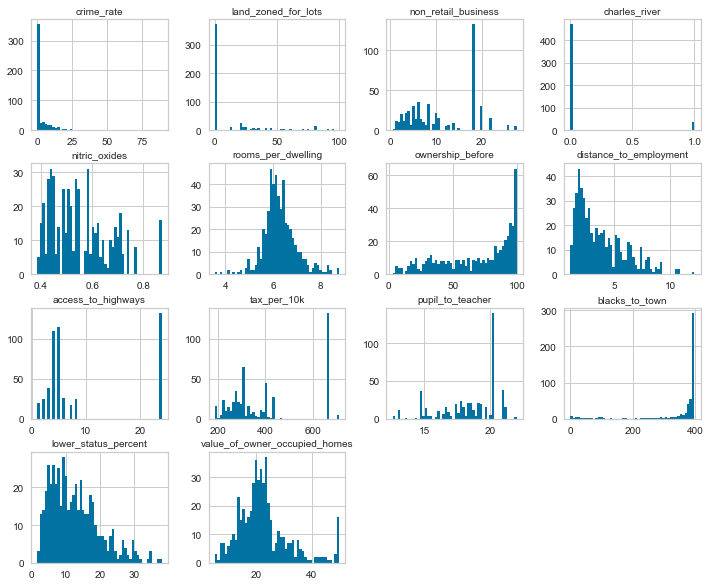

In [10]:
plt.rc('font', size = 10)
plt.rc('legend', fontsize = 10)
plt.rc('axes', labelsize = 10, titlesize = 10)
plt.rc('ytick', labelsize = 10)
plt.rc('xtick', labelsize = 10)
df_boston.hist(bins = 50, figsize = (12, 10))
plt.show()

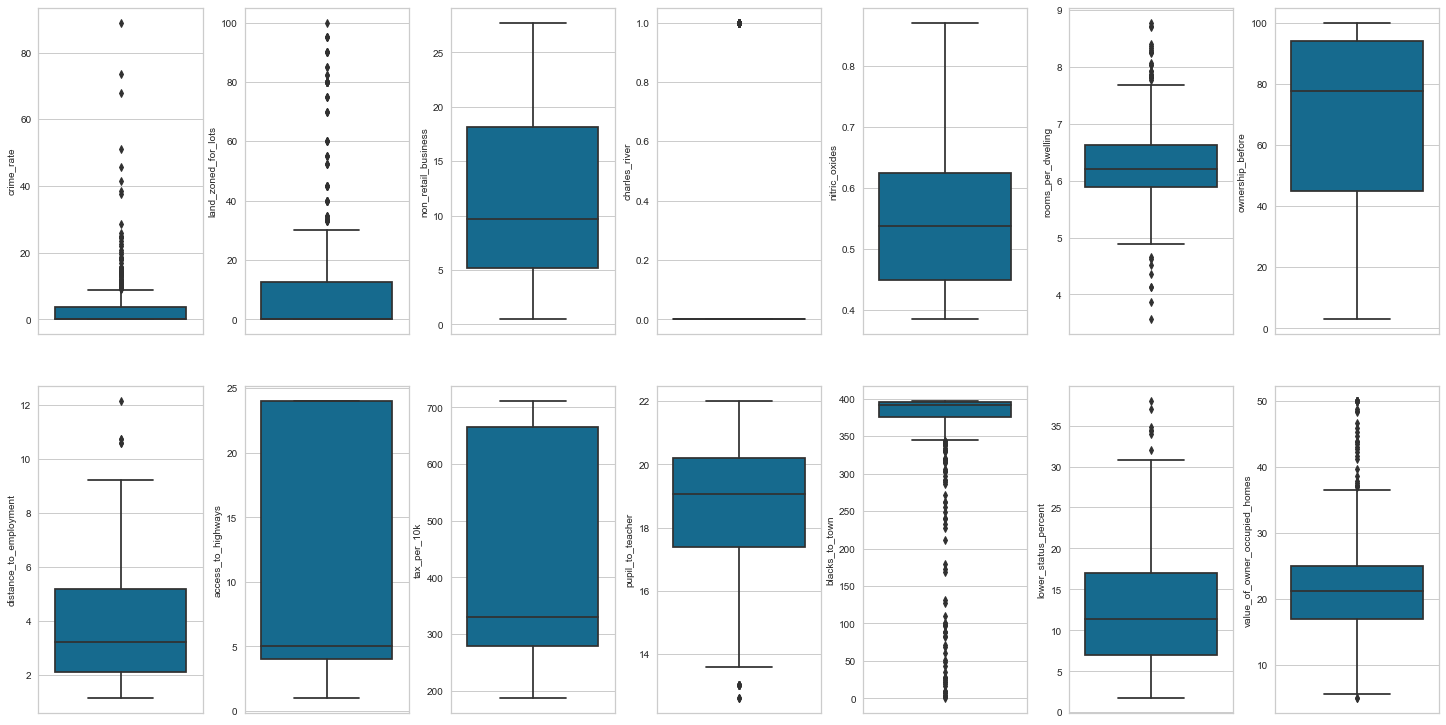

In [11]:
fig, axs = plt.subplots(ncols= 7, nrows= 2, figsize = (20,10))
index = 0
axs = axs.flatten()
for key, value in df_boston.items():
    sns.boxplot(y = key, data = df_boston, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [12]:
for key, value in df_boston.items():
    q1 = value.quantile(0.25)
    q3 = value.quantile(0.75)
    difference = q3 - q1
    value_column = value[(value <= q1 - 1.5 * difference) | (value >= q3 + 1.5 * difference)]
    shape = np.shape(value_column)[0] * 100.0 / np.shape(df_boston)[0]
    print("column %s outliers = %.2f%%" % (key,shape))

column crime_rate outliers = 13.04%
column land_zoned_for_lots outliers = 13.44%
column non_retail_business outliers = 0.00%
column charles_river outliers = 100.00%
column nitric_oxides outliers = 0.00%
column rooms_per_dwelling outliers = 5.93%
column ownership_before outliers = 0.00%
column distance_to_employment outliers = 0.99%
column access_to_highways outliers = 0.00%
column tax_per_10k outliers = 0.00%
column pupil_to_teacher outliers = 2.96%
column blacks_to_town outliers = 15.22%
column lower_status_percent outliers = 1.38%
column value_of_owner_occupied_homes outliers = 7.91%


In [13]:
# df_boston = df_boston[~(df_boston["value_of_owner_occupied_homes"] >= 50.0)]
# df_boston[df_boston['value_of_owner_occupied_homes'] >= 50.0].head()

In [14]:
# fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
# index = 0
# axs = axs.flatten()
# for key, value in df_boston.items():
#     sns.displot(value, ax = axs[index])
#     index += 1
# plt.show()

In [15]:
corr_matrix = df_boston.corr()
corr_matrix["value_of_owner_occupied_homes"].sort_values(ascending = False)

value_of_owner_occupied_homes    1.000000
rooms_per_dwelling               0.695360
land_zoned_for_lots              0.360445
blacks_to_town                   0.333461
distance_to_employment           0.249929
charles_river                    0.175260
ownership_before                -0.376955
access_to_highways              -0.381626
crime_rate                      -0.388305
nitric_oxides                   -0.427321
tax_per_10k                     -0.468536
non_retail_business             -0.483725
pupil_to_teacher                -0.507787
lower_status_percent            -0.737663
Name: value_of_owner_occupied_homes, dtype: float64

In [16]:
df_boston.corr()

,crime_rate,land_zoned_for_lots,non_retail_business,charles_river,nitric_oxides,rooms_per_dwelling,ownership_before,distance_to_employment,access_to_highways,tax_per_10k,pupil_to_teacher,blacks_to_town,lower_status_percent,value_of_owner_occupied_homes
crime_rate,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
land_zoned_for_lots,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
non_retail_business,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
charles_river,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nitric_oxides,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rooms_per_dwelling,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
ownership_before,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
distance_to_employment,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
access_to_highways,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax_per_10k,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [17]:
# df = df_boston[['crime_rate', 'land_zoned_for_lots', 'non_retail_business',
#        'charles_river', 'nitric_oxides', 'rooms_per_dwelling',
#        'ownership_before', 'distance_to_employment', 'access_to_highways',
#        'tax_per_10k', 'pupil_to_teacher', 'blacks_to_town',
#        'lower_status_percent']]
  
# # VIF dataframe
# vif_data = pd.DataFrame()
# vif_data["feature"] = df.columns
  
# # calculating VIF for each feature
# vif_data["VIF"] = [variance_inflation_factor(df.values, i)
#                           for i in range(len(df.columns))]
  
# print(vif_data)

In [18]:
# # df_boston["crime_rate"] = [float(str(i).replace(",", "")) for i in df_boston["crime_rate"]]
# right_skewed = df_boston['crime_rate']
# trans = PowerTransformer(method = 'yeo-johnson', standardize= True)
# transform = trans.fit_transform(right_skewed)

In [19]:
strat_train_set, strat_test_set = train_test_split(df_boston, test_size = 0.2, random_state=42)

In [20]:
df_features = strat_train_set.copy()

In [21]:
features = df_features.drop("value_of_owner_occupied_homes", axis = 1)
price = df_features["value_of_owner_occupied_homes"]

In [22]:
# right_skewed = df_boston [['crime_rate', 'non_retail_business', 'nitric_oxides', 'distance_to_employment', "lower_status_percent", "tax_per_10k", "value_of_owner_occupied_homes",
#                            'blacks_to_town', 'ownership_before', 'pupil_to_teacher', 'land_zoned_for_lots', 'rooms_per_dwelling', 'charles_river', 'access_to_highways']]

# right_data = right_skewed.iloc[:, 0:6]
# left_data = right_skewed.iloc[:, 7:9]

# pt = PowerTransformer(method = "yeo-johnson")
# pt_left = FunctionTransformer(np.cbrt)

# data = pt.fit_transform(right_data)
# data_left = pt_left.fit_transform(left_data)

# df_boston = DataFrame(data)
# df_boston = DataFrame(data_left)


# df_boston.hist()
# plt.show()

In [23]:
# fig, axs = plt.subplots(ncols= 7, nrows= 2, figsize = (20,10))
# index = 0
# axs = axs.flatten()
# for key, value in df_boston.items():
#     sns.boxplot(y = key, data = df_boston, ax=axs[index])
#     index += 1
# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [24]:
# for key, value in df_boston.items():
#     q1 = value.quantile(0.25)
#     q3 = value.quantile(0.75)
#     difference = q3 - q1
#     value_column = value[(value <= q1 - 1.5 * difference) | (value >= q3 + 1.5 * difference)]
#     shape = np.shape(value_column)[0] * 100.0 / np.shape(df_boston)[0]
#     print("column %s outliers = %.2f%%" % (key,shape))

In [25]:
#   # VIF dataframe
# vif_data = pd.DataFrame()
# vif_data["feature"] = df_boston.columns
  
# # calculating VIF for each feature
# vif_data["VIF"] = [variance_inflation_factor(df_boston.values, i)
#                           for i in range(len(df_boston.columns))]
  
# print(vif_data)

In [26]:
df_boston.columns

Index(['crime_rate', 'land_zoned_for_lots', 'non_retail_business',
       'charles_river', 'nitric_oxides', 'rooms_per_dwelling',
       'ownership_before', 'distance_to_employment', 'access_to_highways',
       'tax_per_10k', 'pupil_to_teacher', 'blacks_to_town',
       'lower_status_percent', 'value_of_owner_occupied_homes'],
      dtype='object')

In [27]:
num_attribute = ['crime_rate', 'land_zoned_for_lots', 'non_retail_business',
       'charles_river', 'nitric_oxides', 'rooms_per_dwelling',
       'ownership_before', 'distance_to_employment', 'access_to_highways',
       'tax_per_10k', 'pupil_to_teacher', 'blacks_to_town',
       'lower_status_percent', 'value_of_owner_occupied_homes']

In [28]:
right_skew_pipeline = make_pipeline(
    PowerTransformer(method = "yeo-johnson"),
    StandardScaler()
)

left_skew_pipeline = make_pipeline(
    FunctionTransformer(np.log),
    StandardScaler()
)

remaining_num_pipeline = make_pipeline(
    StandardScaler())

In [29]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   crime_rate                     506 non-null    float64
 1   land_zoned_for_lots            506 non-null    float64
 2   non_retail_business            506 non-null    float64
 3   charles_river                  506 non-null    int64  
 4   nitric_oxides                  506 non-null    float64
 5   rooms_per_dwelling             506 non-null    float64
 6   ownership_before               506 non-null    float64
 7   distance_to_employment         506 non-null    float64
 8   access_to_highways             506 non-null    int64  
 9   tax_per_10k                    506 non-null    float64
 10  pupil_to_teacher               506 non-null    float64
 11  blacks_to_town                 506 non-null    float64
 12  lower_status_percent           506 non-null    flo

In [30]:
num_pipeline = ColumnTransformer([
    ("right_skew", right_skew_pipeline, ['crime_rate', 'charles_river', 'distance_to_employment', 'lower_status_percent', 'land_zoned_for_lots', 'rooms_per_dwelling']),
    ("left_skew", left_skew_pipeline, ['blacks_to_town', 'pupil_to_teacher']),
    ("remaining", remaining_num_pipeline, ['non_retail_business', 'nitric_oxides', 'access_to_highways', 'tax_per_10k', 'ownership_before'])
])

In [31]:
full_processing = ColumnTransformer(transformers=[
    ('num', num_pipeline, num_attribute)
])

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include = np.number))
)

In [32]:
processed_features = preprocessing.fit_transform(features)
processed_features.shape

(404, 13)

Linear_regression

In [33]:
linear_regression = Pipeline([
    ('preprocessing', preprocessing),
    # ('selector', SelectFromModel(RandomForestRegressor(random_state = 42), threshold=0.005)),
    ('linear', LinearRegression()),
])

linear_regression.fit(features, price)
linear_rmse = -cross_val_score(linear_regression, features, price, scoring = "neg_root_mean_squared_error", cv = 10)
pd.Series(linear_rmse).describe()

count    10.000000
mean      4.489695
std       0.700080
min       3.701478
25%       4.059857
50%       4.330164
75%       4.764844
max       5.762123
dtype: float64

In [34]:
linear_predict = linear_regression.predict(features)
linear_mean_square = mean_squared_error(price, linear_predict, squared = False)

linear_mean_square

4.3050474763377755

Ridge

In [35]:
ridge = Pipeline([
    ("preprocessing", preprocessing),
    # ("selector", SelectFromModel(RandomForestRegressor(random_state= 42), threshold = 0.005)),
     ("ridge", Ridge(alpha = 1, solver = "cholesky"))
])

ridge.fit(features, price)

ridge_rmse = -cross_val_score(ridge, features, price, scoring = "neg_root_mean_squared_error", cv = 10)
pd.Series(ridge_rmse).describe()

count    10.000000
mean      4.488537
std       0.701510
min       3.684941
25%       4.057847
50%       4.320530
75%       4.766441
max       5.757799
dtype: float64

In [36]:
ridge_predict = ridge.predict(features)
ridge_mean_square = mean_squared_error(price, ridge_predict, squared= False)

ridge_mean_square

4.305231942765287

Lasso

In [37]:
lasso = Pipeline([
    ("preprocess", preprocessing),
    ("lasso", Lasso(alpha = 0.5, max_iter = 100, tol = 1e-3))
])
lasso.fit(features, price)

lasso_rmse = -cross_val_score(ridge, features, price, scoring = "neg_root_mean_squared_error", cv = 10)
pd.Series(lasso_rmse).describe()

count    10.000000
mean      4.488537
std       0.701510
min       3.684941
25%       4.057847
50%       4.320530
75%       4.766441
max       5.757799
dtype: float64

In [38]:
lasso_predict = lasso.predict(features)
lasso_mean_square = mean_squared_error(lasso_predict, price, squared = False)
lasso_mean_square

4.717360046465483

ElasticNet

In [39]:
elastic_net = Pipeline([
    ("preprocess", preprocessing),
    ("selector", SelectFromModel(RandomForestRegressor(random_state= 42), threshold= 0.005)),
    ("elastic", ElasticNet(alpha= 0.1, l1_ratio= 0.5))
])
elastic_net.fit(features, price)


elastic_rmse = -cross_val_score(elastic_net, features, price, scoring = "neg_root_mean_squared_error", cv = 10)
pd.Series(elastic_rmse).describe()

count    10.000000
mean      4.597654
std       0.745353
min       3.554421
25%       4.157267
50%       4.336443
75%       5.055950
max       5.964474
dtype: float64

In [40]:
elastic_net_predict = elastic_net.predict(features)
elastic_mean_error = mean_squared_error(elastic_net_predict, price, squared = False)

elastic_mean_error

4.4584981211989

XGBoost

In [62]:
xgb = Pipeline([
    ("preprocess", preprocessing),
    ("selector", SelectFromModel(RandomForestRegressor(random_state = 42), threshold= 0.005)),
    ("xgboost", XGBRegressor())
])

xgb.fit(features, price)

xgb_rmse = -cross_val_score(xgb, features, price, scoring = "neg_root_mean_squared_error", cv = 10)
pd.Series(xgb_rmse).describe()

count    10.000000
mean      3.604782
std       0.980636
min       2.453027
25%       3.091981
50%       3.268176
75%       4.120153
max       5.648760
dtype: float64

In [63]:
xgb_predict = xgb.predict(features)

xgb_mean_squared = mean_squared_error(price, xgb_predict, squared= False)
xgb_mean_squared

0.02338719404968569

The training error is so much lower than the validation error which means that the model has overfit the traaining data.

SVR

In [43]:
svr = Pipeline([
    ("preprocess", preprocessing),
    ("selector", SelectFromModel(RandomForestRegressor(random_state = 42), threshold= 0.005)),
    ("svr", SVR()) 
])


svr.fit(features, price)

svr_rmse = -cross_val_score(svr, features, price, scoring = "neg_root_mean_squared_error", cv = 10)
pd.Series(svr_rmse).describe()

count    10.000000
mean      5.059805
std       0.886589
min       3.831663
25%       4.457718
50%       4.970413
75%       5.660058
max       6.455935
dtype: float64

In [44]:
svr_predict = svr.predict(features)

svr_mean_squared = mean_squared_error(price, svr_predict, squared= False)
svr_mean_squared

4.819488109459833

RandomForest

In [45]:
random = Pipeline([
    ("preprocess", preprocessing),
    ("selector", SelectFromModel(RandomForestRegressor(random_state = 42), threshold= 0.005)),
    ("rand", RandomForestRegressor()) 
])


random.fit(features, price)

random_rmse = -cross_val_score(random, features, price, scoring = "neg_root_mean_squared_error", cv = 10)
pd.Series(random_rmse).describe()

count    10.000000
mean      3.610312
std       1.003613
min       2.525395
25%       2.815706
50%       3.335653
75%       4.403459
max       5.314114
dtype: float64

In [46]:
random_predict = random.predict(features)

random_mean_squared = mean_squared_error(price, random_predict, squared= False)
random_mean_squared

1.3532064945276023

grid search random forest

In [47]:
full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("selector", SelectFromModel(RandomForestRegressor(random_state = 42), threshold= 0.005)),
    ("random_forest", RandomForestRegressor(random_state=42)),
])

param_grid ={
    'random_forest__n_estimators': [10, 50],
     'random_forest__max_features': [4, 6, 8],
     'random_forest__min_samples_leaf': [1, 3, 5, 10],
     'random_forest__min_samples_split': [2, 4, 6, 8],

}

grid_search = GridSearchCV(full_pipeline, param_grid= param_grid, cv = 3, scoring = 'neg_root_mean_squared_error', n_jobs = -1)

grid_search.fit(features, price)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('columntransformer',
                                                                         ColumnTransformer(transformers=[('right_skew',
                                                                                                          Pipeline(steps=[('powertransformer',
                                                                                                                           PowerTransformer()),
                                                                                                                          ('standardscaler',
                                                                                                                           StandardScaler())]),
                                                                                                          ['crime_rate',
                                                                                                           'charles_river',
                                                                                                           'distance_to_employment',
                                                                                                           'lower_status_percent',
                                                                                                           'land_zoned_for_lo...
                                        SelectFromModel(estimator=RandomForestRegressor(random_state=42),
                                                        threshold=0.005)),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'random_forest__max_features': [4, 6, 8],
                         'random_forest__min_samples_leaf': [1, 3, 5, 10],
                         'random_forest__min_samples_split': [2, 4, 6, 8],
                         'random_forest__n_estimators': [10, 50]},
             scoring='neg_root_mean_squared_error')

In [48]:
grid_search.best_params_

{'random_forest__max_features': 4,
 'random_forest__min_samples_leaf': 1,
 'random_forest__min_samples_split': 4,
 'random_forest__n_estimators': 50}

In [49]:
grid_search_rmse = -grid_search.best_score_
grid_search_rmse

3.777117881147577

In [50]:
grid_search.fit(features, price)
grid_search_predict = grid_search.predict(features)

search_mean_square = mean_squared_error(price, grid_search_predict, squared = False)
search_mean_square

1.4384257256850443

random search random forest

In [51]:
full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    # ("selector", SelectFromModel(RandomForestRegressor(random_state = 42), threshold= 0.005)),
    ("random_forest", RandomForestRegressor(random_state=42)),
])


param_distribs = {
    'random_forest__max_features': randint(low=3, high= 20),
    'random_forest__n_estimators': randint(low= 2, high = 30),
    'random_forest__min_samples_split': randint(low=2, high = 20),
    'random_forest__min_samples_leaf': randint(low= 2, high = 30)
}

random_search = RandomizedSearchCV(full_pipeline, param_distribs, n_iter = 10, cv = 3, scoring = "neg_root_mean_squared_error", random_state= 42, n_jobs = -1)

random_search.fit(features, price)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('columntransformer',
                                                                               ColumnTransformer(transformers=[('right_skew',
                                                                                                                Pipeline(steps=[('powertransformer',
                                                                                                                                 PowerTransformer()),
                                                                                                                                ('standardscaler',
                                                                                                                                 StandardScaler())]),
                                                                                                                ['crime_rate',
                                                                                                                 'charles_river',
                                                                                                                 'distance_to_employment',
                                                                                                                 'lower_status_percent',
                                                                                                                 'land_zoned_...
                                        'random_forest__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021FDD58B130>,
                                        'random_forest__min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021FDD589C00>,
                                        'random_forest__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021FDB9621D0>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [52]:
random_search.best_params_

{'random_forest__max_features': 14,
 'random_forest__min_samples_leaf': 7,
 'random_forest__min_samples_split': 3,
 'random_forest__n_estimators': 29}

In [53]:
random_search_rmse = -random_search.best_score_
random_search_rmse

4.307208649232581

In [54]:
random_search.fit(features, price)
random_search_predict = random_search.predict(features)

random_mean_square = mean_squared_error(price, random_search_predict, squared = False)
random_mean_square

3.0284891780190164

Grid search with xgboost

In [64]:
full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    # ("selector", SelectFromModel(RandomForestRegressor(random_state = 42), threshold = 0.005)),
    ("xgboost", XGBRegressor()),
])


params = {
    'xgboost__min_child_weight': [1, 5, 10],
    'xgboost__gamma': [0.5, 1, 1.5, 2, 2.5],
    'xgboost__subsample': [0.4, 0.6, 0.8, 1.0],
    'xgboost__colsample_bytree': [0.6, 0.8, 1.0],
    'xgboost__max_depth': [3, 4, 5]
}

grid_search_xgboost = GridSearchCV(full_pipeline, param_grid = params, cv = 3, scoring = "neg_root_mean_squared_error", n_jobs= -1)

grid_search_xgboost.fit(features, price)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('columntransformer',
                                                                         ColumnTransformer(transformers=[('right_skew',
                                                                                                          Pipeline(steps=[('powertransformer',
                                                                                                                           PowerTransformer()),
                                                                                                                          ('standardscaler',
                                                                                                                           StandardScaler())]),
                                                                                                          ['crime_rate',
                                                                                                           'charles_river',
                                                                                                           'distance_to_employment',
                                                                                                           'lower_status_percent',
                                                                                                           'land_zoned_for_lo...
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'xgboost__colsample_bytree': [0.6, 0.8, 1.0],
                         'xgboost__gamma': [0.5, 1, 1.5, 2, 2.5],
                         'xgboost__max_depth': [3, 4, 5],
                         'xgboost__min_child_weight': [1, 5, 10],
                         'xgboost__subsample': [0.4, 0.6, 0.8, 1.0]},
             scoring='neg_root_mean_squared_error')

In [65]:
grid_search_xgboost.best_params_

{'xgboost__colsample_bytree': 1.0,
 'xgboost__gamma': 2.5,
 'xgboost__max_depth': 3,
 'xgboost__min_child_weight': 10,
 'xgboost__subsample': 1.0}

In [66]:
xgboost_grid_rmse = -grid_search_xgboost.best_score_
xgboost_grid_rmse

3.630142628341543

In [67]:
grid_search_xgboost.fit(features, price)
grid_search_predict = grid_search_xgboost.predict(features)

grid_mean_square = mean_squared_error(price, grid_search_predict, squared = False)
grid_mean_square

1.128611472904045

Random search hyperparameter tuning xgboost

In [68]:
full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("selector", SelectFromModel(RandomForestRegressor(random_state = 42), threshold = 0.005)),
    ("xgboost", XGBRegressor(random_state=42)),
])

param_distribs = {
    'xgboost__min_child_weight': randint(low = 1, high = 20),
    'xgboost__gamma': randint(low = 0.5, high = 5),
    'xgboost__subsample': randint(low = 0.4, high = 2),
    'xgboost__colsample_bytree': randint(low = 0.6, high = 2),
    'xgboost__max_depth': randint(low = 3, high = 50)
}

random_search_xg= RandomizedSearchCV(full_pipeline, param_distribs, n_iter = 10, cv = 3, scoring = "neg_root_mean_squared_error", random_state= 42, n_jobs = -1)

random_search_xg.fit(features, price)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('columntransformer',
                                                                               ColumnTransformer(transformers=[('right_skew',
                                                                                                                Pipeline(steps=[('powertransformer',
                                                                                                                                 PowerTransformer()),
                                                                                                                                ('standardscaler',
                                                                                                                                 StandardScaler())]),
                                                                                                                ['crime_rate',
                                                                                                                 'charles_river',
                                                                                                                 'distance_to_employment',
                                                                                                                 'lower_status_percent',
                                                                                                                 'land_zoned_...
                                        'xgboost__gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021FDC39FA30>,
                                        'xgboost__max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021FDC299D20>,
                                        'xgboost__min_child_weight': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021FDB962050>,
                                        'xgboost__subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021FDC39CDF0>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [69]:
xgboost_rand_rmse = -random_search_xg.best_score_
xgboost_rand_rmse

3.6875573668579626

In [70]:
random_search_xg.fit(features, price)
random_search_predict = random_search_xg.predict(features)

random_mean_xg = mean_squared_error(price, random_search_predict, squared = False)
random_mean_xg

0.5598964920911704

Analyse the best models and their errors

In [71]:
features_test = strat_test_set.drop("value_of_owner_occupied_homes", axis = 1)
price_test = strat_test_set["value_of_owner_occupied_homes"].copy()

In [72]:
final_model = random_search.best_estimator_

features_test = strat_test_set.drop("value_of_owner_occupied_homes", axis = 1)
price_test = strat_test_set["value_of_owner_occupied_homes"].copy()

final_prediction = final_model.predict(features_test)
final_rmse = mean_squared_error(price_test, final_prediction, squared = False)
print(final_rmse)

3.506070637573728


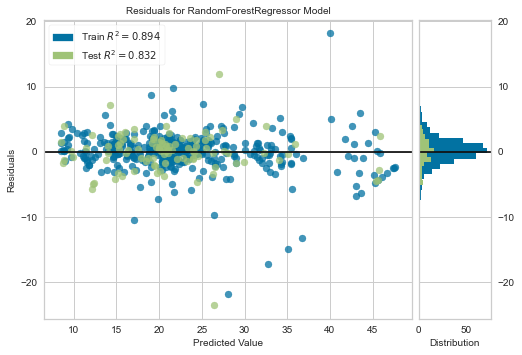

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [73]:
model = random_search.best_estimator_
visualizer = ResidualsPlot(model, hist=True, qqplot=False)

visualizer.fit(features, price)  
visualizer.score(features_test, price_test)  
visualizer.show()

In [74]:
joblib.dump(final_model, "predicting_boston_house_prices_model.pkl")

['predicting_boston_house_prices_model.pkl']